In [1]:
import ROOT
from ROOT import gStyle
gStyle.SetOptStat(0)

Welcome to JupyROOT 6.26/08


In [2]:
#retrieving a file taken with squared scintillators (20H run)
myFile_s = ROOT.TFile.Open("/Users/bertabeltran/muon_data/data/SiPM_angles/SiPMAngleTest_coin_0deg/FILTERED/HcompassF_SiPMAngleTest_coin_0deg_20230720_112010.root")

In [3]:
myFile_s.ls()

TFile**		/Users/bertabeltran/muon_data/data/SiPM_angles/SiPMAngleTest_coin_0deg/FILTERED/HcompassF_SiPMAngleTest_coin_0deg_20230720_112010.root	
 TFile*		/Users/bertabeltran/muon_data/data/SiPM_angles/SiPMAngleTest_coin_0deg/FILTERED/HcompassF_SiPMAngleTest_coin_0deg_20230720_112010.root	
  KEY: TDirectoryFile	Energy;1	Energy
  KEY: TDirectoryFile	Time;1	Time
  KEY: TDirectoryFile	PSD;1	PSD
  KEY: TDirectoryFile	PSD_E;1	PSD_E
  KEY: TTime	RealTime_0;1	object title
  KEY: TTime	LiveTime_0;1	object title
  KEY: TTime	RealTime_1;1	object title
  KEY: TTime	LiveTime_1;1	object title


In [4]:
dir_s = myFile_s.GetDirectory("Energy");

In [5]:
dir_s.ls()

TDirectoryFile*		Energy	Energy
 KEY: TH1D	_F_EnergyCH0@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_0;1	object title
 KEY: TH1D	_F_EnergyCH1@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_1;1	object title


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs


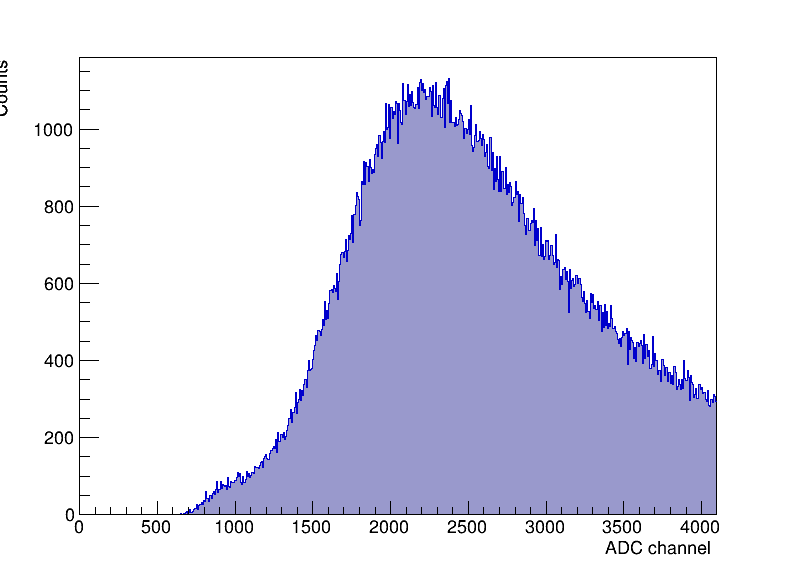

In [20]:
hist_s = dir_s.Get("_F_EnergyCH1@DT5751_1615;1")
hist_s.Rebin(7)
cs = ROOT.TCanvas("cs"," ",800,600)
hist_s.Draw()
cs.Draw()

TDirectoryFile*		Energy	Energy
 KEY: TH1D	_F_EnergyCH0@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_0;1	object title
 KEY: TH1D	_F_EnergyCH1@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_1;1	object title


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cd


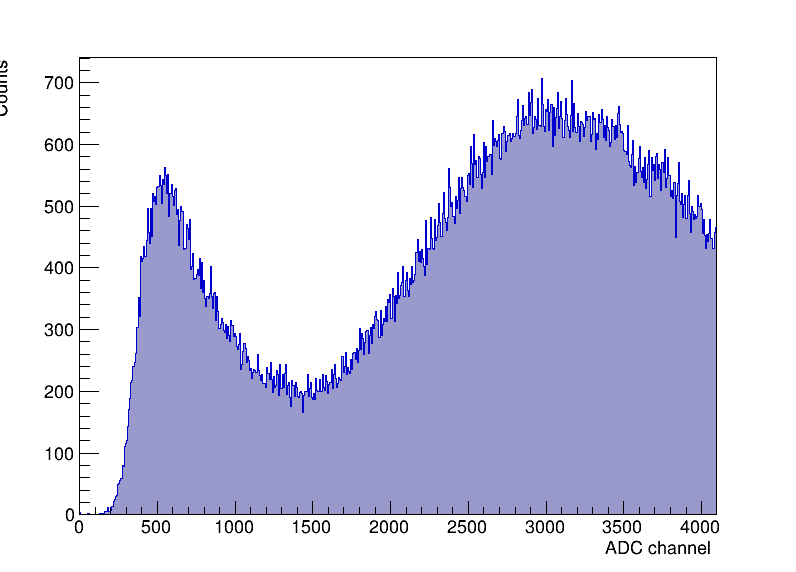

In [23]:
#now we retrieve the first data taken with the DShaped scintillator 
myFile_D = ROOT.TFile.Open("/Users/bertabeltran/muon_data/data/DShaped/DShapedScint_coin_1Ch0_0Ch1/FILTERED/HcompassF_DShapedScint_coin_1Ch0_0Ch1_20230817_084050.root")
dir_D = myFile_D.GetDirectory("Energy");
dir_D.ls()
hist_D = dir_D.Get("_F_EnergyCH1@DT5751_1615")
hist_D.Rebin(7)
cd = ROOT.TCanvas("cd"," ",800,600)
hist_D.Draw()
cd.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /Users/bertabeltran/muon_data/data/DShaped/Rec_vs_DShaped_chan1.png has been created


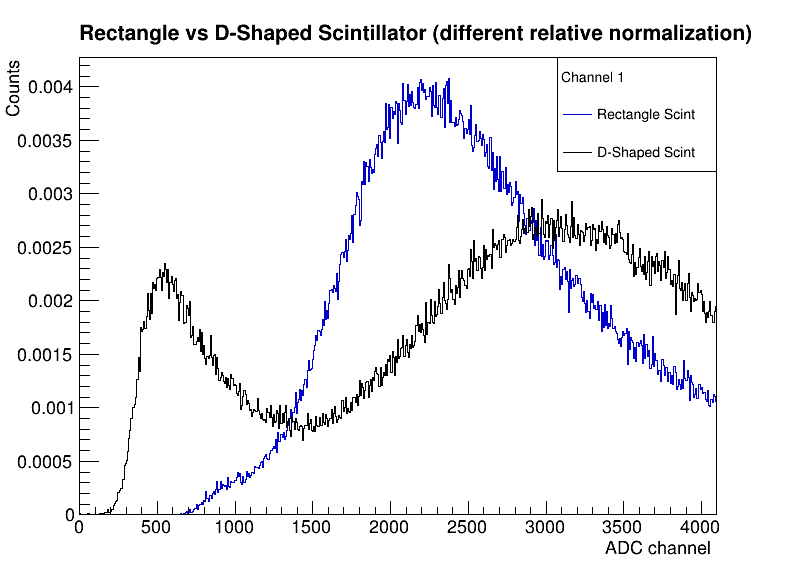

In [25]:

c = ROOT.TCanvas("c","",800,600)


hist_s.SetFillColor(0)
#hist_bkg.GetYaxis().SetRangeUser(0, 0.05)#
hist_s.SetNormFactor(1)
hist_s.Draw()
hist_s.GetYaxis().SetTitleOffset(1.5) #1.2

hist_D.SetLineColor(1)
hist_D.SetFillColor(0)
hist_D.SetNormFactor(1)
hist_D.Draw("same")
#c.SetLogy()
gStyle.SetOptStat(0)

leg = ROOT.TLegend(.7,.7,.9,.9)
leg.SetHeader("Channel 1");
leg.AddEntry(hist_s,"Rectangle Scint ","L")
leg.AddEntry(hist_D,"D-Shaped Scint ","L")
leg.Draw()

tex=ROOT.TLatex(0.1,0.93,"Rectangle vs D-Shaped Scintillator (different relative normalization)");
tex.SetNDC();
tex.SetTextSize(0.04);
tex.Draw();

c.Draw()
c.SaveAs("/Users/bertabeltran/muon_data/data/DShaped/Rec_vs_DShaped_chan1.png");

TDirectoryFile*		Energy	Energy
 KEY: TH1D	_F_EnergyCH0@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_0;1	object title
 KEY: TH1D	_F_EnergyCH1@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_1;1	object title


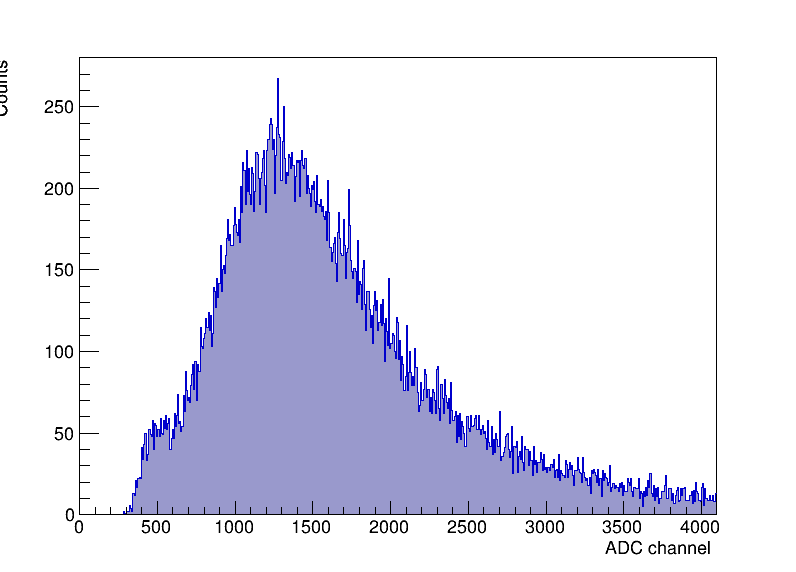

In [9]:
#now we retrieve the data taken with the DShaped scintillator (higher threshold and lower gain )
myFile_DE = ROOT.TFile.Open("/Users/bertabeltran/muon_data/data/DShaped/DShapedScint_coin_1Ch0_0Ch1_100lsb_160fc_LSB/FILTERED/HcompassF_DShapedScint_coin_1Ch0_0Ch1_100lsb_160fc_LSB_20230817_115644.root")
dir_DE = myFile_DE.GetDirectory("Energy");
dir_DE.ls()
hist_DE = dir_DE.Get("_F_EnergyCH0@DT5751_1615")
hist_DE.Rebin(7)
cdE = ROOT.TCanvas("cdE"," ",800,600)
hist_DE.Draw()
cdE.Draw()

Info in <TCanvas::Print>: png file /Users/bertabeltran/muon_data/data/DShaped/DShaped_vs_DShaped_updated.png has been created


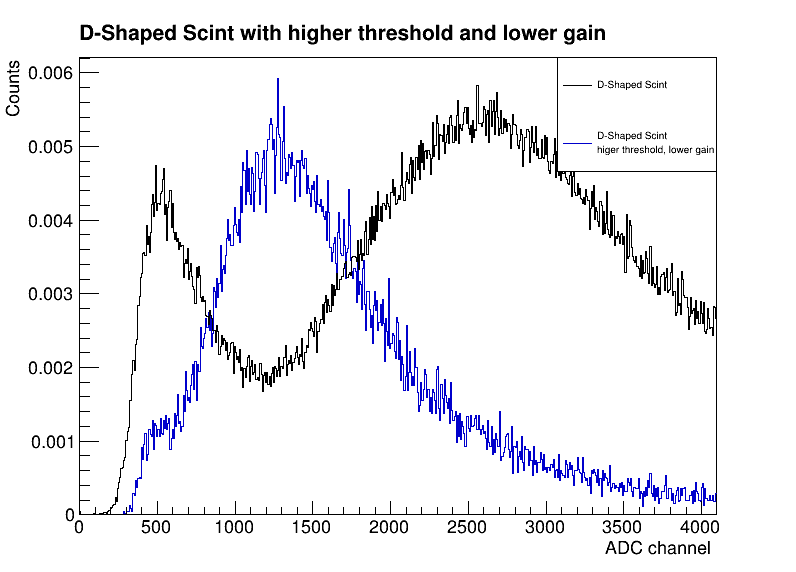

In [10]:
c2 = ROOT.TCanvas("c2","",800,600)


hist_DE.SetFillColor(0)
#hist_DE.SetLineColor(1)
#hist_bkg.GetYaxis().SetRangeUser(0, 0.05)#
hist_DE.SetNormFactor(1)
hist_DE.Draw()
hist_DE.GetYaxis().SetTitleOffset(1.5) #1.2

hist_D.SetLineColor(1)
hist_D.SetFillColor(0)
hist_D.SetNormFactor(2)
hist_D.Draw("same")
#c.SetLogy()
gStyle.SetOptStat(0)

leg = ROOT.TLegend(.7,.7,.9,.9)
leg.AddEntry(hist_D,"D-Shaped Scint ","L")
leg.AddEntry(hist_DE,"#splitline{D-Shaped Scint}{higer threshold, lower gain}","L")
leg.Draw()

tex=ROOT.TLatex(0.1,0.93,"D-Shaped Scint with higher threshold and lower gain ");
tex.SetNDC();
tex.SetTextSize(0.04);
tex.Draw();

c2.Draw()
c2.SaveAs("/Users/bertabeltran/muon_data/data/DShaped/DShaped_vs_DShaped_updated.png");

TDirectoryFile*		Energy	Energy
 KEY: TH1D	_F_EnergyCH0@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_0;1	object title
 KEY: TH1D	_F_EnergyCH1@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_1;1	object title


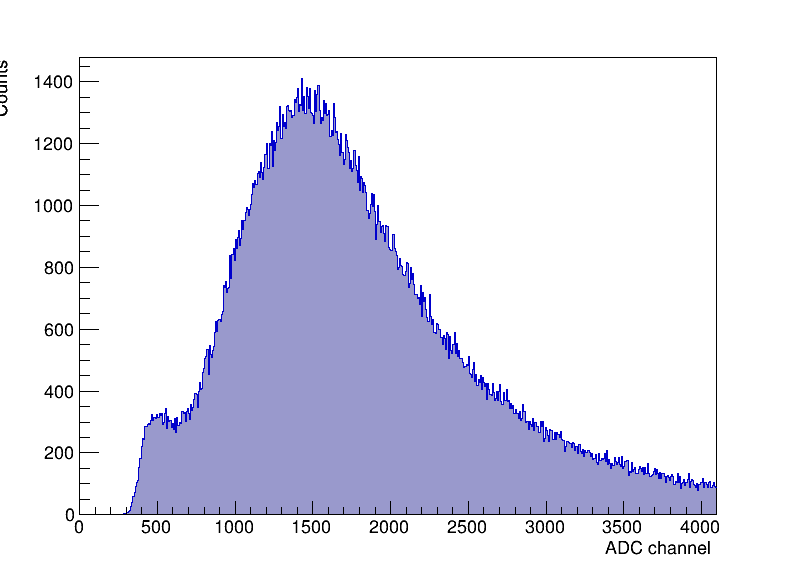

In [11]:
#now we retrieve the data taken with the DShaped scintillator (higher threshold and lower gain ) with holes
myFile_DE_h = ROOT.TFile.Open("/Users/bertabeltran/muon_data/data/DShaped/DShapedScintHole_coin_2CH0_3CH1_100lsb_160_fc_LSB/FILTERED/HcompassF_DShapedScintHole_coin_2CH0_3CH1_100lsb_160_fc_LSB_20230818_112315.root")
dir_DE_h = myFile_DE_h.GetDirectory("Energy");
dir_DE_h.ls()
hist_DE_h = dir_DE_h.Get("_F_EnergyCH0@DT5751_1615")
hist_DE_h.Rebin(7)
cdE_h = ROOT.TCanvas("cdE_h"," ",800,600)
hist_DE_h.Draw()
cdE_h.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::Print>: png file /Users/bertabeltran/muon_data/data/DShaped/DShaped_holes.png has been created


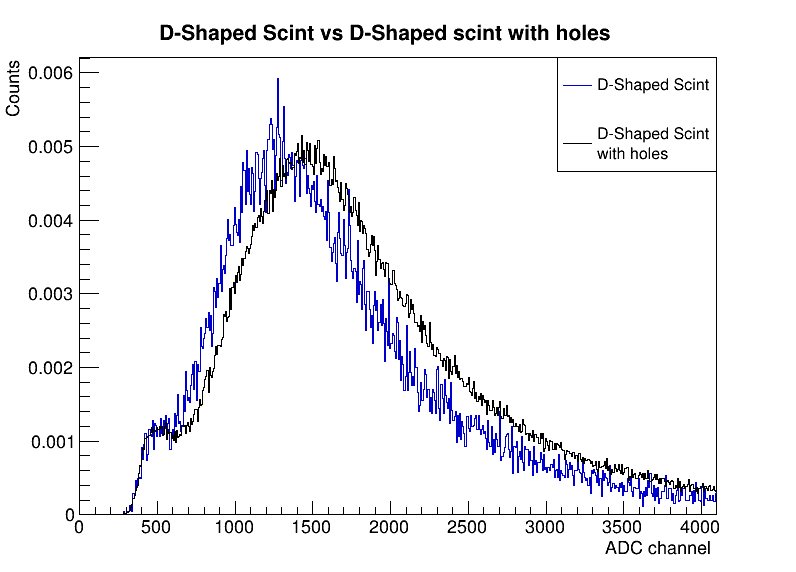

In [13]:
c3 = ROOT.TCanvas("c3","",800,600)


hist_DE.SetFillColor(0)
#hist_DE.SetLineColor(1)
#hist_bkg.GetYaxis().SetRangeUser(0, 0.05)#
hist_DE.SetNormFactor(1)
hist_DE.Draw()
hist_DE.GetYaxis().SetTitleOffset(1.5) #1.2

hist_DE_h.SetFillColor(0)
hist_DE_h.SetLineColor(1)
#hist_bkg.GetYaxis().SetRangeUser(0, 0.05)#
hist_DE_h.SetNormFactor(1.1)
hist_DE_h.Draw("same")
hist_DE_h.GetYaxis().SetTitleOffset(1.5) #1.2

leg = ROOT.TLegend(.7,.7,.9,.9)
leg.AddEntry(hist_DE,"D-Shaped Scint ","L")
leg.AddEntry(hist_DE_h,"#splitline{D-Shaped Scint}{with holes}","L")
leg.Draw()

tex=ROOT.TLatex(0.2,0.93,"D-Shaped Scint vs D-Shaped scint with holes ");
tex.SetNDC();
tex.SetTextSize(0.04);
tex.Draw();

c3.Draw()
c3.SaveAs("/Users/bertabeltran/muon_data/data/DShaped/DShaped_holes.png");